<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Проверим-распределение-гранул-сырья-в-выборках." data-toc-modified-id="Проверим-распределение-гранул-сырья-в-выборках.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Проверим распределение гранул сырья в выборках.</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Решающие-деревья" data-toc-modified-id="Решающие-деревья-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Решающие деревья</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Проверка-на-тестовой-выборке" data-toc-modified-id="Проверка-на-тестовой-выборке-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Проверка на тестовой выборке</a></span></li></ul></li><li><span><a href="#ВЫВОД" data-toc-modified-id="ВЫВОД-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ВЫВОД</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
train['date']= pd.to_datetime(train['date'], format='%Y-%m-%d %H:%M:%S')
test['date']= pd.to_datetime(test['date'], format='%Y-%m-%d %H:%M:%S')
full['date']= pd.to_datetime(full['date'], format='%Y-%m-%d %H:%M:%S')

Найдём все пропущенные значения.

Проанализируем признаки недостпные в тестовой выборке.

В тестовой выюорке доступны только данные, считываемые датчиками. Недоступны данные, которые можно узнать после обработки всех продуктов сырья на всех этапах. Данные, доступные в тестовой выборке указывают нам на доступные признаки  для предсказания.

In [7]:
full.isna().sum().sort_values().tail(20)

final.output.concentrate_sol               385
rougher.input.feed_size                    439
primary_cleaner.output.concentrate_pb      448
rougher.input.floatbank10_xanthate         469
rougher.input.feed_rate                    553
rougher.state.floatbank10_e_air            620
rougher.input.floatbank11_sulfate          678
primary_cleaner.output.concentrate_sol     798
primary_cleaner.input.xanthate            1151
rougher.input.floatbank10_sulfate         1301
primary_cleaner.input.depressant          1546
primary_cleaner.input.sulfate             1609
rougher.calculation.au_pb_ratio           1627
final.output.recovery                     1963
secondary_cleaner.output.tail_sol         2215
rougher.input.floatbank11_xanthate        2257
rougher.output.tail_au                    2736
rougher.output.tail_sol                   2736
rougher.output.tail_ag                    2737
rougher.output.recovery                   3119
dtype: int64

In [8]:
train.isna().sum().sort_values().tail(20)

primary_cleaner.output.concentrate_pb        358
secondary_cleaner.state.floatbank2_a_air     363
final.output.concentrate_sol                 370
rougher.input.feed_size                      417
rougher.input.feed_rate                      513
rougher.state.floatbank10_e_air              603
rougher.input.floatbank11_sulfate            623
primary_cleaner.output.concentrate_sol       636
primary_cleaner.input.xanthate               985
rougher.input.floatbank10_sulfate           1044
rougher.calculation.au_pb_ratio             1242
primary_cleaner.input.depressant            1262
primary_cleaner.input.sulfate               1307
final.output.recovery                       1521
rougher.input.floatbank11_xanthate          1904
secondary_cleaner.output.tail_sol           1986
rougher.output.tail_au                      2249
rougher.output.tail_sol                     2249
rougher.output.tail_ag                      2250
rougher.output.recovery                     2573
dtype: int64

В столбцах много пропущенных значений. В rougher.output.recovery 3119. Рассчитаем это значение.

In [9]:
def recovery_in_percent(output_concentrate,input_feed,output_tail):
    C = output_concentrate
    F = input_feed
    T = output_tail
    return 100 * C * (F - T) / (F * (C - T))

In [10]:
rougher_recovery = recovery_in_percent(
    full['rougher.output.concentrate_au'], full['rougher.input.feed_au'], full['rougher.output.tail_au'])

In [11]:
mean_absolute_error(
    rougher_recovery[ full['rougher.output.recovery'].dropna().index], full['rougher.output.recovery'].dropna())

1.1606241020277064e-14

Функция достаточно точно рассчитывает параметр. Можем рассчитать его для пропущенных значений.

In [12]:
full['rougher.output.recovery'] = rougher_recovery

In [13]:
full[full['rougher.output.recovery'].isna() == True][
    ['rougher.output.concentrate_au','rougher.input.feed_au','rougher.output.tail_au']]

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au
99,0.000000,0.000000,NaN
100,0.000000,0.000000,NaN
101,0.000000,0.000000,NaN
102,0.000000,0.000000,NaN
103,0.000000,0.000000,NaN
...,...,...,...
22465,0.010000,0.010000,NaN
22466,0.010000,0.010000,NaN
22467,0.010000,0.010000,NaN
22468,1.325702,4.988064,NaN


Значения NaN для rougher.output.recovery соответвует содержанию золота в руде 0. Можем удалить эти данные.

In [14]:
full_1 = full[full['rougher.input.feed_au'] > 0.1].copy()

Определим признаки и целевые показатели. Признаки определим по тестовой выборке. Целевым показателем является финальная rougher.output.recovery и final.output.recovery

In [17]:
fetures_col_for_rougher = ['rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air',
       'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
       'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air',
       'rougher.state.floatbank10_d_level', 'rougher.state.floatbank10_e_air',
       'rougher.state.floatbank10_e_level', 'rougher.state.floatbank10_f_air',
       'rougher.state.floatbank10_f_level']

target_col_for_rougher = ['rougher.output.recovery']


fetures_col_for_final = ['primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level']

target_col_for_final =['final.output.recovery']

Определим столбцы, в которых нам важно найти пропущенные значения

In [18]:
col = []
for i in full_1.isna().sum().sort_values().tail(25).index:
    if i in (fetures_col_for_rougher or fetures_col_for_final or target_col_for_rougher):
        col.append(i)
print(col)

['rougher.input.floatbank11_sulfate', 'rougher.input.floatbank10_sulfate', 'rougher.input.feed_pb', 'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.state.floatbank10_e_air', 'rougher.input.floatbank11_xanthate']


In [19]:
full_1[col].isna().sum().sort_values()

rougher.input.floatbank11_sulfate      78
rougher.input.floatbank10_sulfate     102
rougher.input.feed_pb                 146
rougher.input.feed_size               159
rougher.input.feed_sol                261
rougher.state.floatbank10_e_air       510
rougher.input.floatbank11_xanthate    527
dtype: int64

In [20]:
full_1 = full_1.dropna(subset=col).copy()

Видимо, в столбце secondary_cleaner.output.tail_sol появились пропущенные значения из-за слишком маленькой концентрации, заменим пропуски на 0. Аналогично с другими хвостами.

In [21]:
rougher_recovery = recovery_in_percent(
    full_1['rougher.output.concentrate_au'], full_1['rougher.input.feed_au'], full_1['rougher.output.tail_au'])

In [22]:
full_1['rougher.output.recovery'] = rougher_recovery

In [23]:
full_1[full_1['primary_cleaner.output.concentrate_sol'].isna() == True][['rougher.output.concentrate_sol','primary_cleaner.output.tail_sol']]

,rougher.output.concentrate_sol,primary_cleaner.output.tail_sol
74,25.603770,8.285282
130,17.771791,NaN
132,20.178652,NaN
382,25.239335,NaN
383,29.406592,NaN
...,...,...
22656,31.663047,NaN
22657,32.026885,NaN
22658,31.760235,NaN
22659,32.160767,0.869668


Приверим дубликаты

In [24]:
full_1.duplicated().sum()

0

In [25]:
train.index = train['date']
train.drop('date', axis=1, inplace=True)

full_1.index = full_1['date']
full_1.drop('date', axis=1, inplace=True)

test.index = test['date']
test.drop('date', axis=1, inplace=True)

In [26]:
train_1 = full_1.loc[train.index].copy()

print((train_1 == train).mean().mean())

train_1.dropna(inplace=True)
train_1.isna().sum().mean()

0.7840719743992937


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


0.0

In [27]:
test_1 = full_1.loc[test.index,test.columns].copy()

print((test_1 == test).mean().mean())

test_1.dropna(inplace=True)
test_1.isna().sum().mean()

0.8937086223203026


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


0.0

Данные немного расходятся из-за предобработки.

## Проверим распределение гранул сырья в выборках.

Сравним распределение размеров гранул в тестовой 

In [28]:
import matplotlib.pyplot as plt  

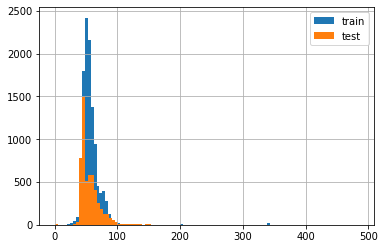

In [29]:
train_1['rougher.input.feed_size'].hist(bins=100,label='train')
test_1['rougher.input.feed_size'].hist(bins=100,label='test')
plt.legend()

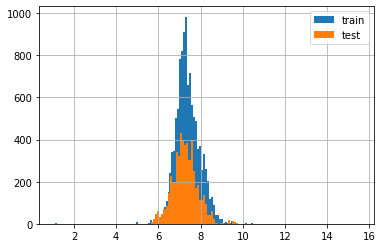

In [30]:
train_1['primary_cleaner.input.feed_size'].hist(bins=100,label='train')
test_1['primary_cleaner.input.feed_size'].hist(bins=100,label='test')
plt.legend()

По гистограммам видно, что распределения в целом совпадают. Но есть несколько аномальных значений, которые мы уберем из выборок.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>ОК,

In [31]:
train_1 = train_1[
    (train_1['rougher.input.feed_size'] < 100) ].copy()
test_1 = test_1[test_1['rougher.input.feed_size'] < 100].copy()

train_1 = train_1[(train_1['primary_cleaner.input.feed_size'] < 10)].copy()
test_1 = test_1[test_1['primary_cleaner.input.feed_size'] < 10].copy()

train_1 = train_1[(train_1['primary_cleaner.input.feed_size'] > 5)].copy()
test_1 = test_1[test_1['primary_cleaner.input.feed_size'] > 5].copy()

Text(0.5, 1.0, 'primary_cleaner')

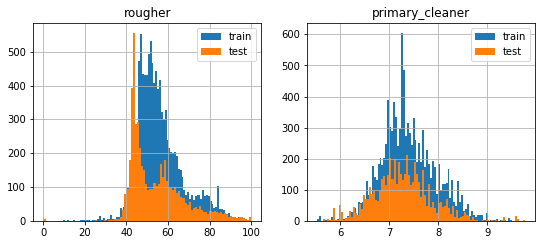

In [32]:
plt.subplot(221)
train_1['rougher.input.feed_size'].hist(bins=100,label='train', figsize=(9,8))
test_1['rougher.input.feed_size'].hist(bins=100,label='test')
plt.legend()
plt.title('rougher')

plt.subplot(222)
train_1['primary_cleaner.input.feed_size'].hist(bins=100,label='train')
test_1['primary_cleaner.input.feed_size'].hist(bins=100,label='test')
plt.legend()
plt.title('primary_cleaner')

Видно, что пик распределения на rougher немного смещен влево, но в целом все значения сосредоточены в таких же границах.

## Анализ данных
Посмотрим, как меняется концентрация сырья в зависимости от этапа. Выделим аномальные значения.

In [33]:
concentrate_col = []
tail_col = []

for i in train_1.columns:
    if (('concentrate' in i) or ('feed_' in i)) and ('size' not in i) and ('_rate' not in i) and ('_to_' not in i):
        concentrate_col.append(i)
    if 'tail_' in i:
        tail_col.append(i)

concentrate_col

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au']

In [36]:
import seaborn as sns
import matplotlib as mpl

In [37]:
tail_col

['final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'rougher.output.tail_au',
 'secondary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_au']

Text(0.5, 1.0, 'Распределение концентрации серебра (Ag) в хвостах на разных этапах очистки')

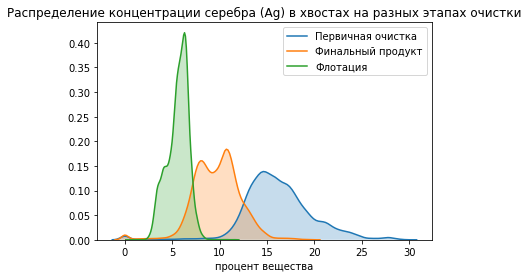

In [38]:
sns.kdeplot(data=full_1['primary_cleaner.output.tail_ag'], shade=True, label='Первичная очистка')
sns.kdeplot(data=full_1['final.output.tail_ag'], shade=True, label='Финальный продукт')
sns.kdeplot(data=full_1['rougher.output.tail_ag'], shade=True , label='Флотация')

plt.xlabel('процент вещества')
plt.title('Распределение концентрации серебра (Ag) в хвостах на разных этапах очистки')

Text(0.5, 1.0, 'Распределение концентрации свинца (Pb) в хвостах на разных этапах очистки')

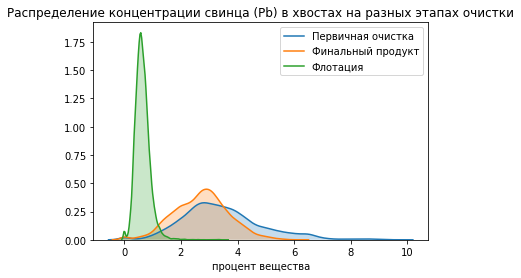

In [39]:
sns.kdeplot(data=full_1['primary_cleaner.output.tail_pb'], shade=True, label='Первичная очистка')
sns.kdeplot(data=full_1['final.output.tail_pb'], shade=True, label='Финальный продукт')
sns.kdeplot(data=full_1['rougher.output.tail_pb'], shade=True , label='Флотация')

plt.xlabel('процент вещества')
plt.title('Распределение концентрации свинца (Pb) в хвостах на разных этапах очистки')

Text(0.5, 1.0, 'Распределение концентрации sol в хвостах на разных этапах очистки')

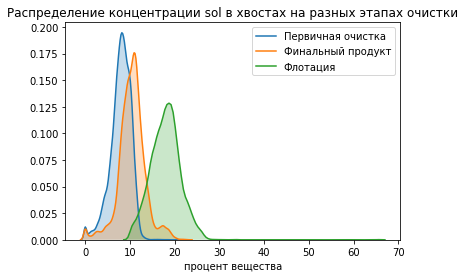

In [40]:
sns.kdeplot(data=full_1['primary_cleaner.output.tail_sol'], shade=True, label='Первичная очистка')
sns.kdeplot(data=full_1['final.output.tail_sol'], shade=True, label='Финальный продукт')
sns.kdeplot(data=full_1['rougher.output.tail_sol'], shade=True , label='Флотация')

plt.xlabel('процент вещества')
plt.title('Распределение концентрации sol в хвостах на разных этапах очистки')

Text(0.5, 1.0, 'Распределение концентрации Золота (Au) в хвостах на разных этапах очистки')

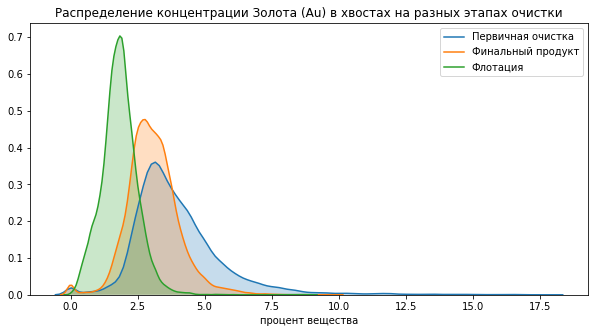

In [41]:
mpl.rc("figure", figsize=(10, 5))
sns.kdeplot(data=full_1['primary_cleaner.output.tail_au'], shade=True, label='Первичная очистка')
sns.kdeplot(data=full_1['final.output.tail_au'], shade=True, label='Финальный продукт')
sns.kdeplot(data=full_1['rougher.output.tail_au'], shade=True , label='Флотация')

plt.xlabel('процент вещества')
plt.title('Распределение концентрации Золота (Au) в хвостах на разных этапах очистки')

Text(0.5, 1.0, 'Распределение концентрации серебра (Ag) на разных этапах очистки')

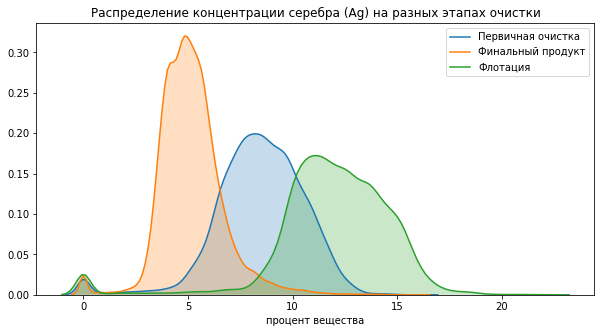

In [42]:
sns.kdeplot(data=full_1['primary_cleaner.output.concentrate_ag'], shade=True, label='Первичная очистка')
sns.kdeplot(data=full_1['final.output.concentrate_ag'], shade=True, label='Финальный продукт')
sns.kdeplot(data=full_1['rougher.output.concentrate_ag'], shade=True , label='Флотация')

plt.xlabel('процент вещества')
plt.title('Распределение концентрации серебра (Ag) на разных этапах очистки')

Text(0.5, 1.0, 'Распределение концентрации свинца (Pb) на разных этапах очистки')

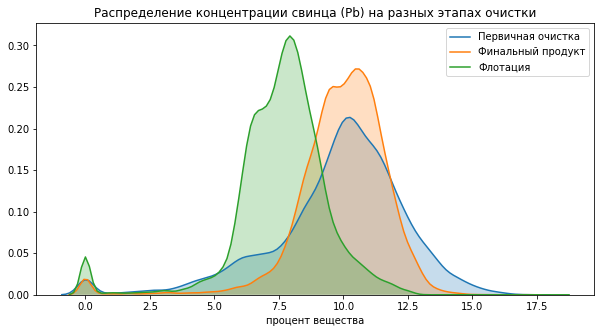

In [43]:
sns.kdeplot(data=full_1['primary_cleaner.output.concentrate_pb'], shade=True, label='Первичная очистка')
sns.kdeplot(data=full_1['final.output.concentrate_pb'], shade=True, label='Финальный продукт')
sns.kdeplot(data=full_1['rougher.output.concentrate_pb'], shade=True , label='Флотация')

plt.xlabel('процент вещества')
plt.title('Распределение концентрации свинца (Pb) на разных этапах очистки')

Text(0.5, 1.0, 'Распределение концентрации sol на разных этапах очистки')

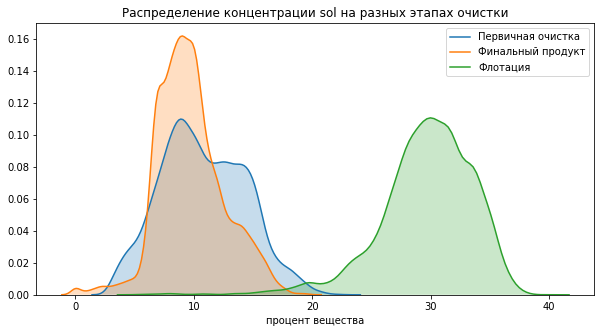

In [74]:
sns.kdeplot(data=full_1['primary_cleaner.output.concentrate_sol'], shade=True, label='Первичная очистка')
sns.kdeplot(data=full_1['final.output.concentrate_sol'], shade=True, label='Финальный продукт')
sns.kdeplot(data=full_1['rougher.output.concentrate_sol'], shade=True , label='Флотация')

plt.xlabel('процент вещества')
plt.title('Распределение концентрации sol на разных этапах очистки')

Text(0.5, 1.0, 'Распределение концентрации золота (Au) на разных этапах очистки')

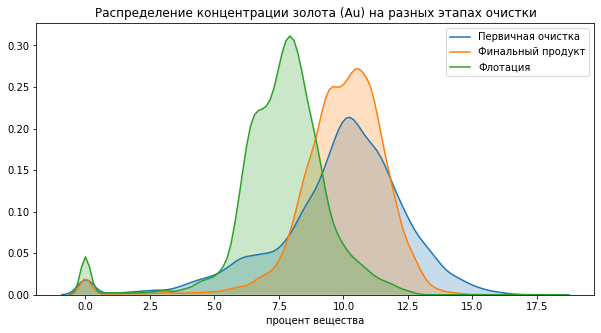

In [45]:
sns.kdeplot(data=full_1['primary_cleaner.output.concentrate_pb'], shade=True, label='Первичная очистка')
sns.kdeplot(data=full_1['final.output.concentrate_pb'], shade=True, label='Финальный продукт')
sns.kdeplot(data=full_1['rougher.output.concentrate_pb'], shade=True , label='Флотация')

plt.xlabel('процент вещества')
plt.title('Распределение концентрации золота (Au) на разных этапах очистки')

Из графиков видно, что после первой обработки появляется много сырья с нулевым содержанием вещества, но в ближе к концу процесса такого сырья меньше, что странно, так как сырьё с нулевым процентным содержанием вещества на выходе и должно дать нулевое содержание. Отбросим эти аномальные значения.

In [47]:
rougher_out = ['rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au']

primary_out = ['primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au']

for i in rougher_out:
    full_1 = full_1[full_1[i] > 5].copy()
    train_1 = train_1[train_1[i] > 5].copy()
    
for j in primary_out:
    full_1 = full_1[full_1[j] > 3].copy()
    train_1 = train_1[train_1[i] > 3].copy()

## Модель

Напишем функцию для вычисления итогового sMAPE

In [48]:
def sMAPE(target,predict):
    N = target.shape[0]
    result = (2 * np.abs(target.iloc[:,0] - predict[0]) /( np.abs(predict[0]) + np.abs(target.iloc[:,0]))).sum() / N
    return result

In [49]:
def final_sMAPE(target_rougher, predict_rougher, target_final, predict_final):
    result = 0.25 * sMAPE(target_rougher, predict_rougher) + 0.75 * sMAPE(target_final,predict_final)
    return result

Создадим свою функцию для кроссвалидации.

In [50]:
scorer = make_scorer(sMAPE)

Обучим разные модели и подберем лучшую. Проверку модели будем осуществлять с помощью кроссвалидации, поэтому разбивать выборку на тренировочную и вали дационную не нужно. Достаточно только выделить выборку для обучения.

In [51]:
features_rougher = train_1[fetures_col_for_rougher]
target_rougher = train_1[target_col_for_rougher]

features_final = train_1[fetures_col_for_final]
target_final = train_1[target_col_for_final]

In [52]:
features_rougher_train, features_rougher_valid, target_rougher_train, target_rougher_valid = train_test_split(
    features_rougher, target_rougher, test_size=0.25, random_state=12)

features_final_train = features_final.loc[features_rougher_train.index]
target_final_train = target_final.loc[features_rougher_train.index]

In [53]:
features_rougher.shape, features_final.shape

((10485, 21), (10485, 30))

### Линейная регрессия

In [54]:
lin_model_rougher = LinearRegression().fit(features_rougher_train, target_rougher_train)

lin_pred_rougher = pd.DataFrame(lin_model_rougher.predict(features_rougher_train)[:,0],index=features_rougher_train.index)

In [55]:
lin_model_final = LinearRegression().fit(
    features_final_train.join(lin_pred_rougher,how='right'), target_final_train)

print('Среднее для кросс валидации на процессе флотации:', cross_val_score(
    lin_model_rougher,
    features_rougher_train,
    target_rougher_train,
    scoring=scorer,
    cv=3).mean().round(3)* 100,'%')

print('Среднее для кросс валидации на финальных характеристиках:', cross_val_score(
    lin_model_final,
    features_final_train.join(lin_pred_rougher,how='right'),
    target_final_train,
    scoring=scorer,
    cv=3).mean().round(3) * 100,'%')

Среднее для кросс валидации на процессе флотации: 9.8 %
Среднее для кросс валидации на финальных характеристиках: 11.4 %


На флотации модель показывает sMAPE 9.8% а для финальных характеристик эта метрика равна 11.4%, оценим качество других моделей.

### Решающие деревья
Сначала посмотрим, как модель справляется с предсказанием, а потом подберем гиперпараметры.

In [56]:
tree_model_rougher = DecisionTreeRegressor(random_state=12345).fit(
    features_rougher_train, target_rougher_train)

tree_pred_rougher = pd.DataFrame(
    tree_model_rougher.predict(features_rougher_train),index=features_rougher_train.index)

In [57]:
tree_model_final = DecisionTreeRegressor(random_state=12344).fit(
    features_final_train.join(tree_pred_rougher,how='right'), target_final_train)

In [58]:
print('Среднее для кросс валидации на процессе флотации:',cross_val_score(
    tree_model_rougher,
    features_rougher_train,
    target_rougher_train,
    scoring=scorer,
    cv=3).mean().round(3)* 100,'%')

Среднее для кросс валидации на процессе флотации: 8.1 %


In [59]:
print('Среднее для кросс валидации на финальных характеристиках:',(cross_val_score(
    tree_model_final,
    features_final_train.join(tree_pred_rougher,how='right'),
    target_final_train,
    scoring=scorer,
    cv=3).mean()* 100).round(3),'%')

Среднее для кросс валидации на финальных характеристиках: 23.404 %


Для финальных данных решающие деревья предсказывают sMAPE равным 20%, что больше, чем у Линейной регрессии. Посмотрим, как поменяется результат при настройке гиперпараметров.

In [60]:
depth_r = 0
depth_f = 0
tree_model_rougher = None
tree_model_final = None
score_r = 100
score_f = 100

for dep in range(6,19):
    model_rougher = DecisionTreeRegressor(max_depth=dep,random_state=12345)  
    model_final = DecisionTreeRegressor(max_depth=dep,random_state=12345)
    
    model_rougher.fit(features_rougher_train, target_rougher_train)
    predict = pd.DataFrame(model_rougher.predict(features_rougher_train),index=features_rougher_train.index) 
    
    model_final.fit(features_final_train.join(predict, how='right'), target_final_train)
    
    r2_rougher = cross_val_score(
        model_rougher, features_rougher_train, target_rougher_train,scoring=scorer, cv=3).mean().round(4)
    r2_final = cross_val_score(
        model_final, features_final_train.join(predict, how='right'), target_final_train, scoring=scorer, cv=3).mean().round(4)
    
    if r2_rougher < score_r:
        score_r = r2_rougher
        tree_model_rougher = model_rougher
        depth_r = dep
        
    if r2_final < score_f:
        score_f = r2_final
        tree_model_final = model_final
        depth_f = dep

In [61]:
print('Значение  для флотации: {:.2%} \nГлубина дерева: {}'.format(
    score_r,depth_r))
print('Значение для финальных данных: {:.2%} \nГлубина дерева: {}'.format(
    score_f,depth_f))

Значение  для флотации: 8.04% 
Глубина дерева: 13
Значение для финальных данных: 11.38% 
Глубина дерева: 11


Настройка гиперпараметров не сильно улучшила результат. Максимальное качество для финального предсказания 20.17%

### Случайный лес
Сначала посмотрим, как модель справляется с предсказанием, а потом подберем гиперпараметры.

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
forest_model_rougher = RandomForestRegressor(random_state=12345).fit(
    features_rougher_train, target_rougher_train)

forest_pred_rougher = pd.DataFrame(
    forest_model_rougher.predict(features_rougher_train),index=features_rougher_train.index)

In [64]:
forest_model_final =  RandomForestRegressor(random_state=12344).fit(
    features_final_train.join(forest_pred_rougher,how='right'), target_final_train)

print('Среднее для кросс валидации на процессе флотации:',cross_val_score(
    forest_model_rougher, features_rougher_train, target_rougher_train,scoring=scorer, cv=3).mean().round(3))

print('Среднее для кросс валидации на финальных характеристиках:',cross_val_score(
    forest_model_final, features_final_train.join(forest_pred_rougher,how='right'), target_final_train,scoring=scorer, cv=3).mean().round(3))

Среднее для кросс валидации на процессе флотации: 0.116
Среднее для кросс валидации на финальных характеристиках: 0.185


Без настройки параметров модель выдаёт результат схожий с остальными. Подберем гиперпараметры.

In [65]:
forest_depth_r = 0
forest_depth_f = 0
forest_model_rougher = None
forest_model_final = None
score_f = 100
score_r = 100

for dep in range(15, 19):
    model_rougher = RandomForestRegressor(n_estimators=20, max_depth=dep, random_state=12345)
    model_final = RandomForestRegressor(n_estimators=20, max_depth=dep, random_state=12345)
    
    model_rougher.fit(features_rougher_train, target_rougher_train)
    predict = pd.DataFrame(model_rougher.predict(features_rougher_train),index=features_rougher_train.index) 
    
    model_final.fit(features_final_train.join(predict, how='right'), target_final_train)
    
    r2_rougher = cross_val_score(
        model_rougher, features_rougher_train, target_rougher_train,scoring=scorer, cv=3).mean().round(4)
    r2_final = cross_val_score(
        model_final, features_final_train.join(predict, how='right'), target_final_train, scoring=scorer, cv=3).mean().round(4)
    
    if r2_rougher < score_r:
        score_r = r2_rougher
        forest_model_rougher = model_rougher
        forest_depth_r = dep
        
    if r2_final < score_f:
        score_f = r2_final
        forest_model_final = model_final
        forest_depth_f = dep

In [66]:
print('Значение для флотации: {:.2%} \nГлубина деревьев: {}'.format(
    score_r,forest_depth_r))
print('Значение для финальных данных: {:.2%} \nГлубина деревьев: {}'.format(
    score_f,forest_depth_f))

Значение для флотации: 10.18% 
Глубина деревьев: 15
Значение для финальных данных: 18.07% 
Глубина деревьев: 18


In [67]:
forest_N_r = 20
forest_N_f = 20
forest_model_rougher = None
forest_model_final = None

for N in range(10, 25, 5):
    model_rougher = RandomForestRegressor(n_estimators=N, max_depth=forest_depth_r, random_state=12345)
    model_final = RandomForestRegressor(n_estimators=N, max_depth=forest_depth_f, random_state=12345)
    
    model_rougher.fit(features_rougher_train, target_rougher_train)
    predict = pd.DataFrame(model_rougher.predict(features_rougher_train),index=features_rougher_train.index) 
    
    model_final.fit(features_final_train.join(predict, how='right'), target_final_train)
    
    r2_rougher = cross_val_score(
        model_rougher, features_rougher_train, target_rougher_train,scoring=scorer, cv=3).mean().round(4)
    r2_final = cross_val_score(
        model_final, features_final_train.join(predict, how='right'), target_final_train, scoring=scorer, cv=3).mean().round(4)
    
    if r2_rougher > score_r:
        score_r = r2_rougher
        forest_model_rougher = model_rougher
        forest_N_r = N
        
    if r2_final > score_f:
        score_f = r2_final
        forest_model_final = model_final
        forest_N_f = N

In [68]:
print('Значение метрики качества для флотации: {:.2%} \nКоличество деревьев: {}'.format(
    score_r,forest_N_r))
print('Значение метрики качества для финальных данных: {:.2%} \nКоличество деревьев: {}'.format(
    score_f,forest_N_f))

Значение метрики качества для флотации: 10.18% 
Количество деревьев: 20
Значение метрики качества для финальных данных: 18.71% 
Количество деревьев: 20


Наилуший результат показала модель решающих деревьев.   
Прверим её качество на тестовой выборке.

### Проверка на тестовой выборке

In [69]:
target_test_rourgher = full_1.loc[test_1.index, target_col_for_rougher]
target_test_final = full_1.loc[test_1.index, target_col_for_final]

In [70]:
predict_test_rougher = pd.DataFrame(
    tree_model_rougher.predict(test_1[fetures_col_for_rougher]),
    index=test_1.index)

predict_test_final = pd.DataFrame(
    tree_model_final.predict(test_1[fetures_col_for_final].join(predict_test_rougher, how='right')),
    index=test_1.index)

In [71]:
print('Итоговая sMAPE для тестовой выборки {:.2%}'.format(
    final_sMAPE(target_test_rourgher, predict_test_rougher, target_test_final, predict_test_final)))

Итоговая sMAPE для тестовой выборки 10.17%


Проверим качество случайной модели.

In [72]:
target_rougher = full_1.loc[test_1.index,target_col_for_rougher]
target_final = full_1.loc[test_1.index,target_col_for_final]

predict_rougher_mean = np.array([train_1[target_col_for_rougher].mean()] * len(test_1))
predict_final_mean =np.array([train_1[target_col_for_final].mean()] * len(test_1))

In [73]:
print('sMAPE на флотации для констатной модели {:.2%}'.format(
    sMAPE(target_rougher, predict_rougher_mean)))
print('sMAPE на финальном продукте для констатной модели {:.2%}'.format(
    sMAPE(target_final, predict_final_mean)))

print('Итоговая sMAPE для случайной модели {:.2%}'.format(
    final_sMAPE(target_rougher, predict_rougher_mean, target_final, predict_final_mean)))

sMAPE на флотации для констатной модели 4.84%
sMAPE на финальном продукте для констатной модели 8.25%
Итоговая sMAPE для случайной модели 7.39%


## ВЫВОД

Все модели даже на тренировочной выборке показывали качество по метрике sMAPE не выше 21%. Для работы выбрали модель решающего дерева.

Итоговое sMAPE для тестовой выборки равен 10.17%. Модель предсказывает хуже, чем  константная (7.39%). Необходимо дополнительное исследование с применением альтурнативных моделей.